<font size=25>Laboratory 1 summary</font>

In this lab you will:

* learn to to create and manipulate tensors

* gain an intuition of underfitting and overfitting by computing the closed-form solutions of linear regression over polynomial features

One core concept used in Deep Learning is the **tensor**. 

A tensor is an interesting mathematical concept that's widely used in many science fields. For the sake of simplicity, we're going to think about a tensor as a multi-dimensional array of real numbers. 

A 1D tensor is an vector, a 2D tensor is a matrix and so on:

![Source: DataCamp](https://i.imgur.com/1Ai1wAB.jpg)
*Image source: [DataCamp](https://www.datacamp.com/)*

PyTorch is a multi-purpose Machine Learning Python library that has a number of advantages and features:

*   It can be used as a general-purpose tensor compute engine (similar to NumPy [[1]]).
*   It has GPU acceleration.
*   It has a strong auto-differentiation (autograd) engine (we can easily train neural networks with it).
*   It is a very popular **deep learning research platform that provides maximum flexibility and speed**.

[1]: https://numpy.org/

# **Part I: Basic tensor operations**

## Initializing tensors

PyTorch supports tensors and provides a lot of useful tensor operations. Let's play with some of them. When in doubt, look up function definitions and examples of use in the official PyTorch documentation https://pytorch.org/docs/stable/tensors.html

In [9]:
import torch
import numpy

### Create tensor from existing data
Let's create our first tensor from a list. 

In [10]:
x = torch.tensor([1, 2, 3])
print(x)

tensor([1, 2, 3])


What is the type of our Tensor? We can find out by inspecting the ```.dtype``` attribute of the Tensor object. All Tensor types are listed in the documentation: https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype



In [11]:
print(x.dtype)

torch.int64


What is the size of our Tensor? To find out, call ```.size()``` or the attribute ```.shape``` on the Tensor object.

In [12]:
print(x.size())
print(x.shape)

torch.Size([3])
torch.Size([3])


Where is our Tensor located? To find out whether the tensor is loaded into RAM or resides on the GPU, inspect the ```.device``` attribute.

In [13]:
print(x.device)

cpu


To move Tensor to either CPU/GPU, call function ```.to()``` on the Tensor object with the argument ```device='cpu'``` or ```device='cuda'```.

In [14]:
x = x.to('cuda')
print(x.device)

cuda:0


Let's move the Tensor back to the CPU.

In [15]:
x = x.to('cpu')
print(x.device)

cpu


Let's now create 2 other Tensors of different shapes.

In [16]:
y = torch.tensor([[1, 2, 3], 
                  [4, 5, 6.0]])
z = torch.tensor([[[3, 7], [6, 1]],
                  [[0, 9], [2, 5]]])
print(y)
print(z)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[[3, 7],
         [6, 1]],

        [[0, 9],
         [2, 5]]])


What are the shapes and types of ```y``` and ```z```?

In [17]:
print('y shape: ', y.size())
print('z shape: ', z.size())
print('y type: ', y.dtype)
print('z type: ', z.dtype)

y shape:  torch.Size([2, 3])
z shape:  torch.Size([2, 2, 2])
y type:  torch.float32
z type:  torch.int64


### Create tensor using predefined operations

Let's create a Tensor and populate it with random numbers. We can call the [```torch.rand()```](https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand) function, which populates the Tensor with numbers from U(0, 1). The function requires the dimensions of the Tensor as arguments.

In [18]:
x = torch.rand(2, 3)
print(x)

tensor([[0.7131, 0.0482, 0.6237],
        [0.9850, 0.5098, 0.3569]])


To create a Tensor filled with 1s, use the function ```torch.ones()```.

In [19]:
x = torch.ones(3, 3)  # Creates a 3x3 2D Tensor initialized with 1s
print(f'2D Tensor: \n{x}')
print(f'type: {x.dtype}')

2D Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
type: torch.float32


To create a Tensor filled with zeros, use the function ```torch.zeros()```.

In [20]:
x = torch.zeros(3, 3, 3)  # Creates a 3x3x3 3D Tensor initialized with 0s
print(f'3D Tensor: \n{x}')
print(f'type: {x.dtype}')

3D Tensor: 
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
type: torch.float32


TODO: Create a 2D Tensor of size 100x100 representing an identity matrix. Use a predefined ```PyTorch``` operation (hint: look up function in the documentation - section Creation Ops [link to documentation](https://pytorch.org/docs/stable/torch.html#tensor-creation-ops))

In [ ]:
#x = torch...
print(x)
print(x.size())

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

You can create an interval \[```start_index```, ```stop_index```) using the [```torch.arange()```](https://pytorch.org/docs/stable/generated/torch.arange.html#torch.arange) function.

In [21]:
x = torch.arange(start=0, end=10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


If you want steps > 1, use the ```step``` argument

In [22]:
x = torch.arange(start=10, end=20, step=2)
print(x)

tensor([10, 12, 14, 16, 18])


### Conversions

To convert a Float Tensor let's say to Long, use the [```.long()```](https://pytorch.org/docs/stable/generated/torch.Tensor.long.html?highlight=long) function.

In [23]:
x = torch.ones(2, 3)
print(x)
print(x.dtype)

y = x.long()
print(y)
print(y.dtype)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.float32
tensor([[1, 1, 1],
        [1, 1, 1]])
torch.int64


Another option is to call the [```.to()```](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to) function (which we used to move Tensors to GPU and back to CPU) and specify the ```dtype``` argument.

In [24]:
z = x.to(dtype=torch.int32)
print(z)
print(z.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.int32


Sometimes our datasets are saved as [NumPy](https://numpy.org/doc/stable/reference/index.html#reference) arrays. To convert them to Tensors, call the [```torch.astensor()```](https://pytorch.org/docs/stable/generated/torch.as_tensor.html?highlight=as_tensor#torch.as_tensor) function.

In [25]:
x_np = numpy.array([1, 2, 3])
x = torch.as_tensor(x_np)
print(x)
print(x.dtype)

tensor([1, 2, 3])
torch.int64


## Basic arithmetic
Let's do some basic matrix operations with PyTorch. 


In [26]:
# Create a 3x4 random PyTorch Tensor and a 3x4 one filled with ones.
rand_tens = torch.randn(3, 4)
ones_tens = torch.ones(3, 4)
print(f'Random PyTorch Tensor:\n{rand_tens}')
print(f'Ones PyTorch Tensor:\n{ones_tens}')

Random PyTorch Tensor:
tensor([[-0.1160,  1.0876,  1.3076,  1.8334],
        [-1.2011,  0.4044, -0.3409,  0.1784],
        [-0.4788, -0.0294,  1.3942,  1.4412]])
Ones PyTorch Tensor:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


You can perform addition:

In [27]:
print(f'Their sum:\n{ones_tens + rand_tens}')

Their sum:
tensor([[ 0.8840,  2.0876,  2.3076,  2.8334],
        [-0.2011,  1.4044,  0.6591,  1.1784],
        [ 0.5212,  0.9706,  2.3942,  2.4412]])


And subtraction:

In [28]:
print(f'Their difference:\n{ones_tens - rand_tens}')

Their difference:
tensor([[ 1.1160, -0.0876, -0.3076, -0.8334],
        [ 2.2011,  0.5956,  1.3409,  0.8216],
        [ 1.4788,  1.0294, -0.3942, -0.4412]])


Matrix addition is not defined if the shapes are not the same. What do you think happens if you add a number to a Tensor?

In [29]:
resulting = ones_tens + 1
print(resulting)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


Notice how *1* is added to every element in the Tensor. This convenient operation is called *broadcasting* and it's a way of '**stretching/copying**' some Tensor dimensions - we're gonna come back to this concept a bit later. 

Let's now multiply two matrices using `torch.mm()`:


In [30]:
print(f'Their product:\n{torch.mm(ones_tens, rand_tens)}')

RuntimeError: ignored

Whoops. Recall from Linear Algebra that matrix dimensions must agree. If A is an `m×n` matrix and B is an `n×p` matrix, the product will be an `m×p` matrix. Let's use `torch.transpose()` to swap the dimensions of `rand_tens`:

In [31]:
print(f'Their product:\n{torch.mm(ones_tens, torch.transpose(rand_tens, 0, 1))}')

Their product:
tensor([[ 4.1126, -0.9592,  2.3272],
        [ 4.1126, -0.9592,  2.3272],
        [ 4.1126, -0.9592,  2.3272]])


TODO: Compute $X = ABC$, where $A$, $B$ and $C$ are three matrices defined below:

In [ ]:
A = torch.rand(3, 10)
B = torch.rand(10, 30)
C = torch.rand(30, 5)
#X = ...
print(X)

tensor([[30.5876, 33.6122, 33.8433, 37.5969, 30.9681],
        [24.3803, 26.7490, 27.1848, 30.3093, 25.0446],
        [45.0921, 49.1305, 48.9904, 55.4764, 45.7049]])


Do not confuse ```torch.mm``` with ```*``` operator, which computes elementwise multiplication (if Tensor dimensions agreee):

In [32]:
x = torch.arange(0, 10)
y = torch.arange(10, 20)
print('x = ', x)
print('y = ', y)
print('elementwise multiplication: ', x*y)

x =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y =  tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
elementwise multiplication:  tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])


Let's compute the sum of all the elements in a Tensor using ```torch.sum()```.

In [33]:
x = torch.ones(2, 5)
print(x)
2 x 5 -> 1 x 5

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [34]:
print('sum of elements in x = ', torch.sum(x))

sum of elements in x =  tensor(10.)


What if we want to compute the sum over the columns of a 2D Tensor? We can specify the ```dim``` argument:

In [35]:
torch.sum(x, dim=0) 

tensor([2., 2., 2., 2., 2.])

What happens when we specify ```dim=1```?

In [36]:
torch.sum(x, dim=1) 

tensor([5., 5.])

The sum is computed over the rows of the tensor. You can think of `dim` as the dimension which is reduced/collapses as a result of the operation. 

In [38]:
# tensor containing 100 images
images = torch.randn(100, 3, 32, 32) #=> 100 x 32 x 32

# TODO: compute pixelwise mean over the 3 channels
ch_mean = torch.mean(images, dim=1)

print(ch_mean.size())

torch.Size([100, 32, 32])


We can compute the vector norm of a 1D Tensor of length n using [```torch.linalg.norm()```](https://pytorch.org/docs/stable/generated/torch.linalg.norm.html#torch.linalg.norm):
$$\|\textbf{x}\| = \sqrt{x_1^{2}+x_2^{2}+...+x_n^{2}}$$

In [40]:
x = torch.rand(10)
# TODO
x_norm = torch.linalg.norm(x)
print(x)
print("norm = ", x_norm)

tensor([0.6863, 0.4915, 0.6015, 0.3988, 0.4344, 0.8307, 0.1769, 0.2953, 0.1056,
        0.5748])
norm =  tensor(1.6038)


TODO: compute the vector norm using [```torch.sum()```](https://pytorch.org/docs/stable/generated/torch.sum.html?highlight=sum#torch.sum) and [```torch.sqrt()```](https://pytorch.org/docs/stable/generated/torch.sqrt.html?highlight=sqrt#torch.sqrt)

In [ ]:
#x_norm_2 = ...
print("norm = ", x_norm_2)

norm =  tensor(1.5865)


## Non-arithmetic tensor operations

You can also do non-arithmetic operations, like slicing, reshaping and concatenation. 

### Concatenating & Stacking Tensors

In [41]:
# Let's make some 2D Tensors:
m1 = torch.zeros(3, 4)
m2 = torch.ones(3, 4)
m3 = torch.ones(3, 4) * 2
print(f'm1: {m1} shape: {m1.shape}\nm2: {m2} shape: {m2.shape}\nm3: {m3} shape: {m3.shape}')

m1: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) shape: torch.Size([3, 4])
m2: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) shape: torch.Size([3, 4])
m3: tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]) shape: torch.Size([3, 4])


Let's concatenate them over dimension 0:

In [42]:
concat = torch.cat((m1, m2, m3), dim=0)
print(f'Concatenated (dim=0):\n{concat} shape: {concat.shape}')

Concatenated (dim=0):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]) shape: torch.Size([9, 4])


... or over dimension 1:

In [43]:
concat = torch.cat((m1, m2, m3), dim=1)
print(f'Concatenated: (dim=1)\n{concat} shape: {concat.shape}')

Concatenated: (dim=1)
tensor([[0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.]]) shape: torch.Size([3, 12])


**There's a subtle difference between *concatenation* and *stacking*:**

Consider three arrays with the following elements: [1, 1], [2, 2], [3, 3]

If you *concatenate* them, the resulting array will be [1, 1, 2, 2, 3, 3] (1D - shape, same number of dimensions)

If you *stack* them, the resulting array will be [[1, 1], [2, 2], [3, 3]] (2D - shape, additional dimension)

In [44]:
# Tensors can also be stacked:
stacked = torch.stack((m1, m2, m3))
print(f'Stacked: (dim=0)\n{stacked} shape: {stacked.shape}')
# The Stacked tensor has 3 dimensions while the concatenated one has just 2.

Stacked: (dim=0)
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]]) shape: torch.Size([3, 3, 4])


### Slicing Tensors

Sometimes you need to select parts of your tensor. This is called *slicing/indexing*. Slicing in PyTorch is done using the `[ ]` operator (same as in NumPy).

Let's get back the slices from our stacked Tensor.
We're basically indexing the matrices along the first dimension.



In [45]:
first_slice = stacked[0]
second_slice = stacked[1]
third_slice = stacked[2]
print(f'{first_slice}\n{second_slice}\n{third_slice}')

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


Let's now define a random cube.

In [46]:
cube = torch.rand(3, 3, 3)
print(cube)

tensor([[[0.1639, 0.5622, 0.2993],
         [0.3513, 0.1544, 0.2878],
         [0.6121, 0.7244, 0.4091]],

        [[0.3246, 0.8934, 0.6694],
         [0.6982, 0.8762, 0.9331],
         [0.3879, 0.7618, 0.8468]],

        [[0.6713, 0.7528, 0.8475],
         [0.2146, 0.6379, 0.5220],
         [0.0606, 0.2469, 0.6209]]])


To select the central element in the cube, we specify its position (0-indexed) along all dimensions/axes:

In [ ]:
cube[1,1,1] # second matrix, second row, second column 

tensor(0.8930)

To select all the elements from a dimension, you can use `[:]`. Let's get the middle line from the central matrix:

In [ ]:
cube[1,1,:] # second matrix, second row, all columns

tensor([0.3167, 0.8930, 0.4574])

You can specify ranges by combining `:` and numbers. For instance:
 - `[:idx]` means all indices up to idx (excluding `idx`)
 - `[idx:]` means all indices starting from `idx` (including `idx`) all the way to the end
 - `[left_idx:right_idx]` means all indices starting from `left_idx` to `right_idx`

One neat trick to get all elements except for the last one is to use `[:-1]`

#### Exercise 1

 a) TODO: Slice tensor `x` (defined in the code block below) to obtain matrices 
 
```
 A = [[1, 2],
      [4, 5], 
      [7, 8]]
```
and 
```
 B = [[22, 23, 24],
      [25, 26, 27]]
```


In [ ]:
x = torch.arange(1, 28).reshape(3, 3, 3)
print(x)
# A = ...
# B = ...
print(A)
print(B)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])
tensor([[1, 2],
        [4, 5],
        [7, 8]])
tensor([[22, 23, 24],
        [25, 26, 27]])


 b) TODO: Use `torch.mm` to multiply `A` and `B`

In [ ]:
# C = ...

correct_result = torch.tensor(
  [[ 72.,  75.,  78.],
  [213., 222., 231.],
  [354., 369., 384.]]
)
assert torch.all(torch.eq(C, correct_result)), "try again :("

In [ ]:
x = torch.arange(1, 28).reshape(3, 3, 3)
print(x)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])


### Reshaping Tensors

Consider the `3x9` Tensor below. Let's reshape it into a cube.

In [50]:
x = torch.tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 2., 2., 2.]])
print(x)
print(x.shape)

tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]])
torch.Size([3, 9])


In [52]:
print(f'Before reshape: \n{x}, shape: {x.shape}')
cube_fst = x.reshape(3, 3, -1)
print(f'After reshape: \n{cube_fst}, shape: {cube_fst.shape}')
# Note that we've expanded a 2D tensor onto 3 dimensions!

Before reshape: 
tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]]), shape: torch.Size([3, 9])
After reshape: 
tensor([[[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]]]), shape: torch.Size([3, 3, 3])


One caveat is the fact that you can't specify the reshape dimension. For instance, each of the vectors above
```
[0., 0., 0., 1., 1., 1., 2., 2., 2.]
```
are reshaped into a `3x3` matrix, and then stacked together.

What do you think happens when you reshape the `9x3` transpose of `x` into `3x3x3` cube?

In [53]:
x_concat = x.transpose(dim0=0, dim1=1)
print(f'Before reshape: \n{x_concat}, shape: {x_concat.shape}')
cube_snd = x_concat.reshape(3,3,3)
print(f'After reshape: \n{cube_snd}, shape: {cube_snd.shape}')

Before reshape: 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]), shape: torch.Size([9, 3])
After reshape: 
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]]), shape: torch.Size([3, 3, 3])


### Collapsing, squeezing and unsqueezing Tensors
Sometimes it's useful to `vectorize` a tensor of dimensions `d1 x d2 x ...` to a single array of length `d1*d2*...`. You can easily do this by calling `reshape(-1)` or `view(-1)`.

In [54]:
# initialize random cube
cube = torch.arange(1,28).reshape(3, 3, 3)
print("Cube: \n", cube, " shape: ", cube.shape)

# collapse cube into a single array:
collapsed = cube.reshape(-1)

print("Collapsed cube: \n", collapsed, " shape: ", collapsed.shape)

Cube: 
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])  shape:  torch.Size([3, 3, 3])
Collapsed cube: 
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27])  shape:  torch.Size([27])


We can also explicitly *squeeze* (remove redundant dimensions) and *unsqueeze* (add redundant dimensions) Tensors.

A 1D tensor of shape `5` can be seen as a `1x5` tensor. Analogously, a 2D tensor of shape `5x5` can be seen as a `1x5x5` tensor. This will be extremely helpful when handling *batches* of data (more on that in the next labs).

In [55]:
print("Collapsed: ", collapsed, "shape: ", collapsed.shape)

# Let's unsqueeze the collapsed tensor (add redundant first dimension)
collapsed = collapsed.unsqueeze(0)
print("Unsqueezed: ", collapsed, "shape: ", collapsed.shape)

# Now, let's squeeze the expanded tensor and get back the initial tensor
collapsed = collapsed.squeeze(0)
print("Squeezed: ", collapsed, "shape: ", collapsed.shape)

Collapsed:  tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27]) shape:  torch.Size([27])
Unsqueezed:  tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27]]) shape:  torch.Size([1, 27])
Squeezed:  tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27]) shape:  torch.Size([27])


### Gathering from Tensors
A very useful way to get elements from a Tensor is [`gather()`](https://pytorch.org/docs/stable/torch.html?highlight=gather#torch.gather) - as the name suggests, it is *gathering* values from a tensor `src` along a dimension specified by the `dim` argument. The gathering positions along dimension `dim` are specified by an `index` tensor.

![source: stackoverflow](https://i.stack.imgur.com/nudGq.png)

(**Note that in PyTorch, as opposed to the example above, the indexing starts at 0 for both Tensors and dimensions.)

*Image source: [StackOverflow](https://stackoverflow.com/questions/50999977/what-does-the-gather-function-do-in-pytorch-in-layman-terms)*

In [56]:
random_tensor = torch.randn(3, 4)
print('Initial Tensor:\n', random_tensor)
index = torch.Tensor([[0, 2, 0, 2], [2, 0, 1, 1]]).long()

gathered = torch.gather(input=random_tensor, dim=0, index=index)
print('Gathered Tensor (along dim 0):\n', gathered)

Initial Tensor:
 tensor([[-0.8876, -1.0175, -0.4567, -0.0911],
        [ 0.4011,  0.1272, -0.4170, -0.7733],
        [ 0.1479,  0.4352,  0.5182, -0.5460]])
Gathered Tensor (along dim 0):
 tensor([[-0.8876,  0.4352, -0.4567, -0.5460],
        [ 0.1479, -1.0175, -0.4170, -0.7733]])


### Argmax


You can get the index of the maximum element in a Tensor using `torch.argmax()`.

In [57]:
x = torch.randn(5, 5)
print('Tensor:\n', x)

# alternatively, you can call x.argmax()
argmax_idx = torch.argmax(x) 

# to get the maximum element (without using torch.max),
# we flatten the tensor first and access the location
# indicated by argmax_idx
max_element = x.reshape(-1)[argmax_idx] 
print(f'argmax index: {argmax_idx}, max element: {max_element:0.4f}')

Tensor:
 tensor([[ 0.5735,  1.0118,  0.4164,  1.6672,  1.1533],
        [-0.9692, -0.3396, -1.6852,  2.6730,  0.8711],
        [ 0.0859,  0.1399,  0.3696, -0.1585, -0.7096],
        [ 1.0601,  0.0795,  2.0208, -0.0571, -0.0340],
        [-0.7932,  0.2818,  0.4591, -0.8744, -0.6280]])
argmax index: 8, max element: 2.6730


You can also get the indices of the maximum elements over any dimension (axis) in the Tensor by specifying the `dim` parameter in `torch.argmax(dim=...)`.

In [58]:
x = torch.randn(3, 5)
print('Tensor:\n', x)

argmax_cols = torch.argmax(x, dim=0)
print(f'Indices of maximal elements over columns: {argmax_cols}')

argmax_rows = torch.argmax(x, dim=1)
print(f'Indices of maximal elements over rows: {argmax_rows}')

Tensor:
 tensor([[ 1.6245,  0.6148, -0.3390, -0.8707, -0.0829],
        [-1.6229,  0.0695,  0.7916, -1.1385, -0.9577],
        [ 0.8299, -0.1309,  0.2445,  1.7439,  0.5367]])
Indices of maximal elements over columns: tensor([0, 0, 1, 2, 2])
Indices of maximal elements over rows: tensor([0, 2, 3])


To illustrate a bit how `torch.gather` works, we write a custom `my_max` function that uses ``torch.argmax()`` and ``torch.gather()`` to get the maximum values from a Tensor over a given dimension.

In [59]:
def my_max(x: torch.Tensor, dim: int=0) -> torch.Tensor:
    """
    Maximum elements of x over dimension dim, 
    using torch.argmax and torch.gather.
    """
    argmax_indices = torch.argmax(x, dim=dim)

    assert len(argmax_indices.size()) + 1 == len(x.size()), \
      "argmax_indices should have 1 dimension less than x"

    argmax_indices = argmax_indices.unsqueeze(dim)

    max_values = torch.gather(x, dim, argmax_indices)

    return max_values

Enter your own tensor shape, argmax dimension and run the blocks:

In [60]:
tensor_shape = (5,3) #@param
dim = 0 #@param

In [61]:
x = torch.rand(tensor_shape)
max_values = my_max(x, dim)
print(f"x: \n{x} shape: {x.shape}")
print(f"maximum values over dimension {dim}: \n{max_values} shape: {max_values.shape}")

# check that maximum values returned by my_max() are the
# same as the ones returned by torch.max()
assert torch.all(torch.eq(max_values, 
    torch.max(x, dim=dim, keepdim=True)[0])), "wrong max"

x: 
tensor([[0.2063, 0.1192, 0.6817],
        [0.0647, 0.8768, 0.2480],
        [0.6301, 0.5119, 0.2350],
        [0.2366, 0.4985, 0.0185],
        [0.5863, 0.8933, 0.6373]]) shape: torch.Size([5, 3])
maximum values over dimension 0: 
tensor([[0.6301, 0.8933, 0.6817]]) shape: torch.Size([1, 3])


## Polynomial Linear regression

In this section we will compute the closed-form weights $\textbf{w}$ for linear regression over *polynomial features* and illustrate the concepts of **overfitting** and **underfitting**.

![source: stackoverflow](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRSzpMF0I3xnf2T1mOb6hDEdLfWnSG38PF1s_TrDigGeMo0gftR)

Training points ($x_n$, $t_n$) shown in blue, learned regression function shown in red. Image source: [Bishop, Chapter 1](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)

### Goal
Given points ($x_i^{(train)}$, $t_i^{(train)}$), the goal is to learn a function $y(x, \textbf{w})$ in order to predict target values $t$ for new points $x$.

More specifically, we need to find the weights $\textbf{w}=[w_0, w_1, ..., w_M]$ of function
$$y(x, \textbf{w})=\sum_{j=0}^{M}w_j ϕ_j(x)$$ where $ϕ_j(x)=x^j$.

### 'Linear' misnomer
Even though function $y$ is *linear* in the weights $\textbf{w}$, we learn more complicated mappings from input to output by applying non-linear basis functions $ϕ$ on input $x$. 

For instance, let $\phi_0(x) = 1, \phi_1(x) = x$ and $\phi_2(x) = x^2$. The function $y(x,\textbf{w}) = w_0\phi_0(x) + w_1\phi_1(x) + w_2\phi_2(x) = w_0 + w_1x + w_2x^2$ is quadratic with respect to $x$ but is linear with respect to the weights $w$.

### Error function
To find $\textbf{w}$, we minimize the sum-of-squares error function:
$$E(\textbf{w}) = \frac{1}{2} \sum_{i=1}^{N} (y(x_i^{(train)}, \textbf{w}) - t_i^{(train)})^2$$
(sum of squared lengths of green bars in the picture above)

In [62]:
import torch
import math
from numpy.linalg import lstsq
from sklearn.datasets import make_regression
from torch.distributions import Uniform, Normal
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Drag the slider below to set the number of points in our dataset.

In [63]:
# number of dataset points
N = 10 #@param {type:"slider", min:10, max:100, step:1}

Let's generate 100 points $(x_i, y_i)$  from a sine wave and a dataset of **N** noisy points ($x_i^{(train)}$, $t_i^{(train)}$).

The dataset points are sine measurements corrupted by Gaussian noise:

Let $x_i\in[0,1]$ and $t_{i}^{(train)} = sine(2πx_{i}^{(train)}) + ε_i$ , where $ε_i$ ~$\mathcal{N}(μ=0,σ=0.5)$ 



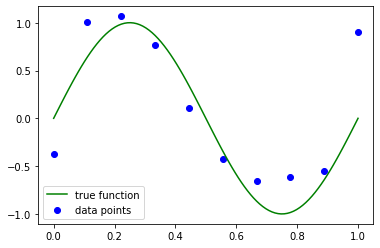

In [64]:
# generate 100 x values on which to evaluate sine
x = torch.linspace(0, 1, 100)

# generate 100 true sine values
y = torch.sin(2 * math.pi * x)

# generate Gaussian noise ε for| each data point
noise = torch.normal(mean=0.0, std=0.5, size=(N,))

# generate dataset points (noisy sine measurements)
# t = y + ε
x_train = torch.linspace(0, 1, N)
t_train = torch.sin(2 * math.pi * x_train) + noise

# plot true function and dataset points
plt.plot(x,y, color='green', label='true function')
plt.scatter(x_train, t_train, marker='o', color='blue', label='data points')
plt.legend()

### Exercise 2

### Polynomial feature vector

An M-degree polynomial feature vector $\textbf{ϕ}$ for a scalar $x$ is a vector of size **M+1**: 

$$\textbf{ϕ} = [ϕ_0(x), ϕ_1(x), ..., ϕ_j(x), ..., ϕ_{M}(x)]$$

where the polynomial basis function is $$ϕ_j(x)=x^j$$

For instance, a 3-degree polynomial feature vector for $x=3$ is

$$\textbf{ϕ}= [1, 3, 3^2, 3^3] = [1,3, 9, 27]$$

We can stack the polynomial feature vectors $\textbf{ϕ}$ for all training points $x_i$ into an **N x (M+1)** matrix $\textbf{Φ}$. 

$$\textbf{Φ} = 
  \begin{pmatrix} 
    ϕ_0(x_1) & ϕ_1(x_1) & \cdots & ϕ_{M}(x_1) \\
    ϕ_0(x_2) & ϕ_1(x_2) & \cdots & ϕ_{M}(x_2) \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    ϕ_0(x_N) & ϕ_1(x_N) & \cdots & ϕ_{M}(x_N)
  \end{pmatrix} = 
  \begin{pmatrix} 
    \textbf{ϕ}(x_1)\\
    \textbf{ϕ}(x_2)\\
    \vdots\\
    \textbf{ϕ}(x_N)
  \end{pmatrix}
$$

**TODO**: Write the `get_polynomial_features` function, that receives a polynomial degree $M$ and a Tensor with scalars $x_1, x_2, ..., x_N$ and returns the **N x (M+1)** matrix $\textbf{Φ}$.

In [ ]:
def get_polynomial_features(x: torch.Tensor, 
                            poly_degree: int) -> torch.Tensor:
    """
    Given N data points, return an N x (M+1) matrix
    with M-degree polynomial features for each data point.
    
    For instance, let x = Tensor([2, 3]) and poly_degree = 3.
    The returned matrix is Φ = Tensor([[1, 2, 4, 8],
                                       [1, 3, 9, 27]])
    :param x: tensor with data points
    :param poly_degree: polynomial degree (integer)
    """
    # TODO: 
    # Φ = ..
    # Solution 1: create an empty Tensor, then fill it with the correct values
    # ...

    # Solution 2: create a list of lists with the correct values, then 
    # convert it to a Tensor
    # ...
    
    assert Φ.shape[-1] == poly_degree + 1, "wrong feature vector shape"

    return Φ

### Closed-form solution for linear regression
The linear regression can be rewritten more compactly:
$$y(x, \textbf{w}) = \sum_{j=0}^{M} w_j ϕ_j(x) = \textbf{w}^{T}\textbf{ϕ}(x)$$

Minimizing the sum-of-squares function $E(\textbf{w})$ above leads to the closed-form solution for $\textbf{w}$:

$$\textbf{w} = (\textbf{Φ}^{T}\textbf{Φ})^{-1}\textbf{Φ}^{T}\textbf{t} = \textbf{Φ}^†\textbf{t}$$

where $\textbf{t}$ contains the target training points 
$$\textbf{t} = [t_1^{(train)}, t_2^{(train)}..., t_N^{(train)}]$$


$\textbf{Φ}^†=(\textbf{Φ}^{T}\textbf{Φ})^{-1}\textbf{Φ}^{T}$ is called the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of matrix $\textbf{Φ}$


In [ ]:
# polynomial degree
M = 2 #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] {type:"raw"}

Φ shape =  torch.Size([14, 10])
weights (computed by scikit-learn):  tensor([[-9.7193e-01,  3.9189e+01, -5.8589e+02,  5.0458e+03, -2.2775e+04,
          5.6517e+04, -8.0045e+04,  6.3890e+04, -2.6282e+04,  4.1974e+03]])
weights (computed by us): tensor([-9.6705e-01,  3.9867e+01, -6.0940e+02,  5.2957e+03, -2.4051e+04,
         6.0152e+04, -8.6127e+04,  6.9833e+04, -2.9422e+04,  4.8904e+03])


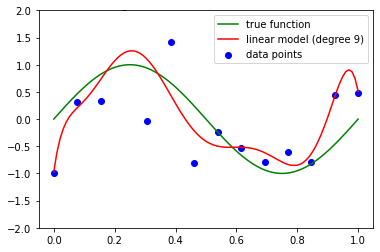

In [ ]:
# TODO ...
# compute polynomial features for data points x_train
# N x (M+1) tensor

# Φ = get_polynomial_features(...)

print("Φ shape = ", Φ.shape)

# compute pseudo-inverse Φ†
# (M+1)xN Tensor
pseudo_inverse_auto = torch.pinverse(Φ)

# Compute weights w according to closed-form equation
# M+1 Tensor
w = torch.matmul(pseudo_inverse_auto, t_train)

# also learn weights w using scikit-learn module
model = LinearRegression(fit_intercept=False)
model.fit(Φ, t_train.unsqueeze(1))
# M+1 Tensor
w_auto = torch.from_numpy(model.coef_)

print("weights (computed by scikit-learn): ", w_auto)
print("weights (computed by us):", w)
assert w.shape == torch.Size([M+1]), "wrong shape"
#assert torch.allclose(w, w_auto, atol=0.1, rtol=0.1), \
#    "Different regression weights"

# Compute polynomial features for all 100 points
# 100 x (M+1) Tensor
dataset_features = get_polynomial_features(
    x.unsqueeze(1),
    poly_degree=M
)

# predict t=y(x,w)=w*x for all 100 x points, using the
# learned weights w
# 100 x 1 Tensor
y_pred = torch.matmul(dataset_features, w.t())

# plot the true sine function
plt.ylim(top=2.0, bottom=-2.0)
plt.plot(x, y, color='green', label='true function')

# plot the learned regression function
plt.plot(x, y_pred, color='red', label='linear model (degree %d)' % (M))

# plot the dataset points
plt.scatter(x_train, t_train, marker='o', color='blue', label='data points')

plt.legend()

Try several values for the polynomial degree M. You will notice that:
 - a small polynomial degree (M<3) results in **underfitting** (linear or quadratic polynomials learn a poor representation of sine)
 - a large value of M results in **overfitting** (model learns to predict the training data points very well, but wildly oscillates and makes large errors on other points)



### Closed-form solution for ridge regression

To combat **overfitting**, you can either:
 - increase the number of training points N (not always possible)
 - add a regularization term $R(\textbf{w})$ to $E(\textbf{w})$ to control model complexity

The regularized error function for [ridge regression](https://en.wikipedia.org/wiki/Regularized_least_squares) is:
$$E'(\textbf{w}) = E(\textbf{w}) + \frac{\lambda}{2} R(\textbf{w}) =\frac{1}{2} \sum_{i=1}^{N} (y(x_i^{(train)}, \textbf{w}) - t_i^{(train)})^2 + \frac{λ}{2}\textbf{w}^T\textbf{w}$$

We now have 2 sources of errors:
 - $E(\textbf{w})$ - large differences between values $y$ predicted by model and train values $t$
 - $R(\textbf{w})$ - large weights $\textbf{w}$

Minimizing $E'(\textbf{w})$ leads to the closed-form solution for $\textbf{w}$:
$$\textbf{w} = (\textbf{Φ}^{T}\textbf{Φ}+λI)^{-1}\textbf{Φ}^{T}\textbf{t}$$
where λ controls the importance of large weights. 

A very small λ will increase model 'complexity' (by ignoring errors from large weights $\textbf{w}$), while a large λ will decrease model 'complexity' (by penalizing large weights $\textbf{w}$).

In [ ]:
# regularization factor
λ = 1e-100 #@param [1e-100, 1e-10, 1e-1, 1, 10] {type:"raw"}

Original least squares weights:  tensor([-9.6705e-01,  3.9867e+01, -6.0940e+02,  5.2957e+03, -2.4051e+04,
         6.0152e+04, -8.6127e+04,  6.9833e+04, -2.9422e+04,  4.8904e+03])
Regularized least squares weights:  tensor([-9.2821e-01,  5.7420e+00,  1.4721e+02, -9.6405e+02,  2.0377e+03,
        -1.2276e+03, -1.4009e+03,  2.2121e+03, -7.8277e+02, -2.8420e+01])


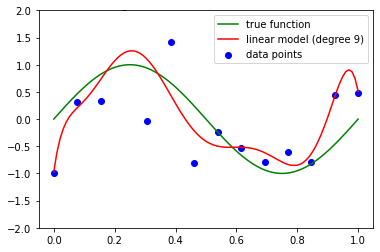

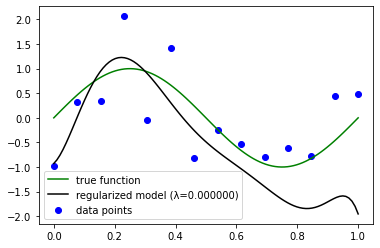

In [ ]:
# compute the "Φ" matrix
# (M+1)x(M+1) Tensor
cov_matrix = torch.matmul(Φ.t(), Φ)
assert cov_matrix.shape == torch.Size([M+1, M+1]),\
     "wrong shape"

# add λ on the diagonal entries of the "Φ" matrix
# that we computed above
cov_diag = cov_matrix + λ * torch.eye(M+1)

# compute its inverse
# (M+1)x(M+1) Tensor
cov_inv = torch.inverse(cov_diag)

# (M+1)xN Tensor
pseudo_inverse = torch.matmul(
    cov_inv,
    Φ.t()
)

# compute regularized least squares weights
# M+1 Tensor
w_reg = torch.matmul(pseudo_inverse, t_train)
print("Original least squares weights: ", w)
print("Regularized least squares weights: ", w_reg)

# predict for all points
y_pred_reg = torch.matmul(dataset_features, w_reg.t())

plt.ylim(top=2.0, bottom=-2.0)

# plot the learned regression function
plt.plot(x, y, color='green', label='true function')
plt.plot(x, y_pred, color='red', label='linear model (degree %d)' % (M))
plt.scatter(x_train, t_train, marker='o', color='blue', label='data points')
plt.legend()
plt.show()

# plot the regularized regression function
plt.plot(x, y, color='green', label='true function')
plt.plot(x, y_pred_reg, color='black', label='regularized model (λ=%f)' % (λ))
plt.scatter(x_train, t_train, marker='o', color='blue', label='data points')
plt.legend()

Notice that:
 - small values of λ combat the **overfitting**, by reducing the large oscillations in the model
 - large values of λ lead to **underfitting**, by making the model too 'rigid'

In [ ]:
#@title Apache License
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Part II: Miscellaneous (optional)

## Broadcasting

As you probably know, not every two matrices can be multiplied or added together.

We sometimes want a similar behaviour to the basic arithmetical operations with some more *relaxed* conditions. This is where **broadcasting** comes in.

Two tensors are *broadcastable* if the following rules hold [[1]]:

*   Each tensor has at least one dimension
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must be either equal, one of them is 1, or one of them does not exist.

The following image illustrates some broadcasting examples:

![broadcast](https://i.imgur.com/3tYs3HO.png)

*Figure adapted from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)*

[1]: https://pytorch.org/docs/stable/notes/broadcasting.html

*The following code snippets are from the official PyTorch docs on broadcasting [[1]].*

In [ ]:
x = torch.empty(5,7,3)
y = torch.empty(5,7,3)
# same shapes are always broadcastable (i.e. the above rules always hold)

x = torch.empty((0,))
y = torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

# can line up trailing dimensions
x = torch.empty(5,3,4,1)
y = torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x = torch.empty(5,2,4,1)
y = torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

If two tensors `x`, `y` are "broadcastable", the resulting tensor size is calculated as follows [[1]]:

*   If the number of dimensions of `x` and `y` are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
*   Then, for each dimension size, the resulting dimension size is the max of the sizes of `x` and `y` along that dimension.

[1]: https://pytorch.org/docs/stable/notes/broadcasting.html

In [ ]:
# can line up trailing dimensions to make reading easier
x = torch.empty(5,1,4,1)
y = torch.empty(  3,1,1)
(x+y).size()

torch.Size([5, 3, 4, 1])

## NumPy Bridge

PyTorch has a very useful NumPy (a strong scientific computing library [[1]]) bridge. 

You can manipulate NumPy arrays and convert them to PyTorch tensors easily:

[1]: https://numpy.org/

In [ ]:
import numpy as np

# Create a 3x4 random NumPy array
np_arr = np.random.rand(3, 4)
print(f'Numpy array:\n{np_arr}')

# Convert it to a PyTorch Tensor using torch.from_numpy()
np_tens = torch.from_numpy(np_arr)
print(f'Tensor from Numpy array:\n{np_tens}')

# You can also use the Tensor constructor
np_tens_cnstr = torch.tensor(np_arr)
print(f'Tensor from Numpy array (constructor):\n{np_tens_cnstr}')

# To convert back, just use .numpy()
back_to_np = np_tens.numpy()
print(f'Numpy array from Tensor:\n{back_to_np}')

Numpy array:
[[0.01403396 0.15682405 0.63644481 0.50401538]
 [0.83894927 0.80386626 0.66836055 0.52180207]
 [0.56872629 0.0908505  0.66961978 0.31559491]]
Tensor from Numpy array:
tensor([[0.0140, 0.1568, 0.6364, 0.5040],
        [0.8389, 0.8039, 0.6684, 0.5218],
        [0.5687, 0.0909, 0.6696, 0.3156]], dtype=torch.float64)
Tensor from Numpy array (constructor):
tensor([[0.0140, 0.1568, 0.6364, 0.5040],
        [0.8389, 0.8039, 0.6684, 0.5218],
        [0.5687, 0.0909, 0.6696, 0.3156]], dtype=torch.float64)
Numpy array from Tensor:
[[0.01403396 0.15682405 0.63644481 0.50401538]
 [0.83894927 0.80386626 0.66836055 0.52180207]
 [0.56872629 0.0908505  0.66961978 0.31559491]]


## GPU Acceleration

PyTorch has a robust GPU acceleration engine that can greatly improve compute times. To move the tensor `T` to the GPU and back, you can use the `.cuda()` and `.cpu()` class member methods.

In [ ]:
# Tensors are computed on CPU by default
x = torch.randn(3,3)
print(f'Compute engine: {x.device}')

# Move it to GPU:
x = x.cuda()
print(f'Compute engine: {x.device}')

# Move it back to the CPU:
x = x.cpu()
print(f'Compute engine: {x.device}')

Compute engine: cpu
Compute engine: cuda:0
Compute engine: cpu


You should be aware of the fact that you can't use both GPU and CPU Tensors together when doing computations. You can have both types of Tensors in memory, but they must agree on the computation engine (GPU or CPU) when "interacting" with each other.

A useful way of automatically moving PyTorch objects to the GPU engine when available is using the following code snippet:

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


Now we can be sure that our tensors will always agree on the computation engine by calling the `.to(device)` member function:

In [ ]:
# Won't work:
x = torch.randn(3,3).cpu()
y = torch.randn(3,3).cuda()
try:
  x + y
except RuntimeError:
  print(f"You can't use both {x.device} and {y.device} in the same computation.")

# Works everytime:
print(f'\n(Engine: {device}) Using .to(device)')
x.to(device) + y.to(device)

You can't use both cpu and cuda:0 in the same computation.

(Engine: cuda) Using .to(device)


tensor([[-1.4060,  1.4716,  3.0267],
        [-1.4426, -0.7504, -1.1823],
        [ 1.3120,  0.3626,  2.2165]], device='cuda:0')

We recommend using the `.to(device)` pattern when attaching Tensors and other PyTorch objects to different compute engines.


**A quick note on running PyTorch locally:**

We strongly recommend using Google Colab for this course, but if you plan on running PyTorch locally, on your own machines, you should know that NVidia GPUs do have the best support from PyTorch. Go through the following instructions [[1]] to install PyTorch locally, on a machine with supported NVidia GPUs.

Running PyTorch on AMD hardware is possible, but much slower and with limited support. Follow the ROCm tutorial [[2]] to install PyTorch on a machine with an AMD GPU.

[1]: https://pytorch.org/get-started/locally/
[2]: https://rocm.github.io/pytorch.html